[EDA] 了解變數分布狀態: Bar & KDE (density plot) <br />
[教學目標] <br />
以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形 <br />
分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受 <br />
順便熟悉 matplotlib 的幾種繪圖設定 <br />
[範例重點] <br />
各種樣式的長條圖(Bar) (In[4], Out[4]) <br />
不同的 KDE 曲線與繪圖設定 (In[5], Out[5]) 以及 切換不同 Kernel function 的效果 (In[6], Out[6]) <br />

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
data_dir = './data/'

In [62]:
f_app = os.path.join(data_dir,'application_train.csv')
df = pd.read_csv(f_app)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df.DAYS_BIRTH = abs(df.DAYS_BIRTH) / 365

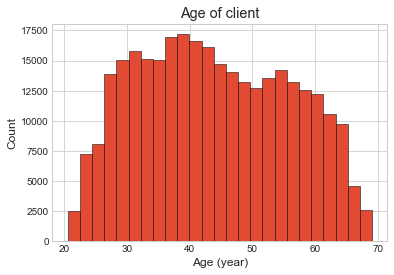

Text(0, 0.5, 'Count')

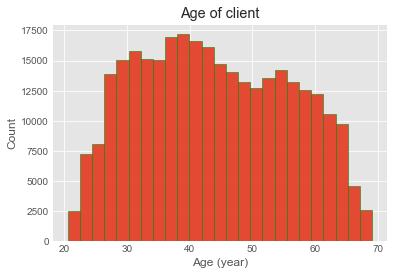

In [68]:
plt.style.use('seaborn-whitegrid')
plt.hist(df.DAYS_BIRTH, edgecolor = 'k', bins = 25)
plt.title('Age of client')
plt.xlabel('Age (year)')
plt.ylabel('Count')

plt.show()

plt.style.use('ggplot')

plt.hist(df.DAYS_BIRTH, edgecolor = 'g', bins = 25)
plt.title('Age of client')
plt.xlabel('Age (year)')
plt.ylabel('Count')

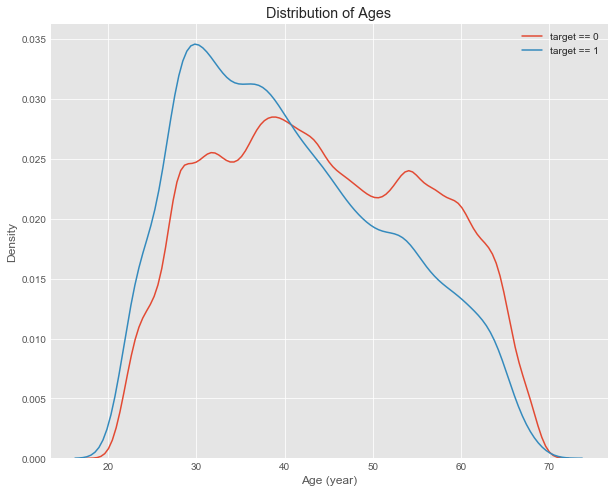

In [69]:
#setting the height and width of plot area
plt.figure(figsize = (10,8))

#Drawing the KDE(Kernel Density Estimation) of client`s age who dont have payment difficulties
sns.kdeplot(df.loc[df.TARGET==0, 'DAYS_BIRTH'], label = 'target == 0')
#Drawing the KDE(Kernel Density Estimation) of client`s age who have payment difficulties
sns.kdeplot(df.loc[df.TARGET==1, 'DAYS_BIRTH'], label = 'target == 1')

#Setting the title, x and y axis information
plt.title('Distribution of Ages')
plt.xlabel('Age (year)')
plt.ylabel('Density')

plt.show()

**From above plot, we can see that people who have payment difficulties are more distirbuted at yonger region. <br />
This is making sense(at least in my opinion)**

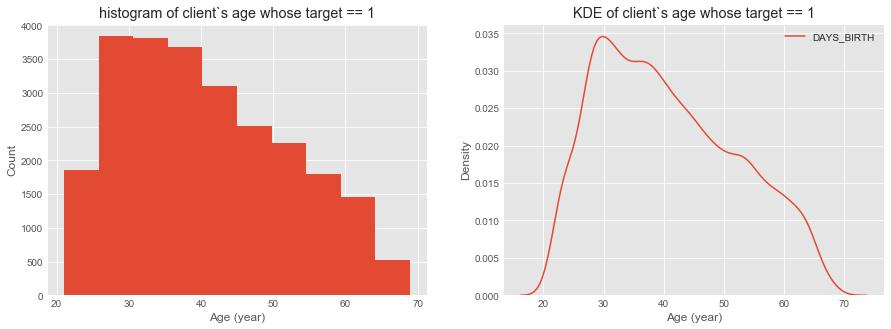

In [70]:
#Why dont we compare the effect of histogram and KDE
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df.loc[df.TARGET==1,'DAYS_BIRTH'])
plt.title('histogram of client`s age whose target == 1')
plt.xlabel('Age (year)')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title('KDE of client`s age whose target == 1')
plt.xlabel('Age (year)')
plt.ylabel('Density')
sns.kdeplot(df.loc[df.TARGET==1,'DAYS_BIRTH'])
plt.show()

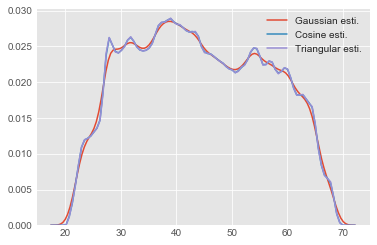

In [71]:
#Compare different kernel function of KED
sns.kdeplot(df.loc[df.TARGET == 0, 'DAYS_BIRTH'], label = 'Gaussian esti.', kernel = 'gau')
sns.kdeplot(df.loc[df.TARGET == 0, 'DAYS_BIRTH'], label = 'Cosine esti.' ,kernel = 'cos')
sns.kdeplot(df.loc[df.TARGET == 0, 'DAYS_BIRTH'], label = 'Triangular esti.', kernel = 'tri')

plt.show()

**補充說明: **<br /> 
1. KDE : https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py <br />
2. What is KDE : https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py



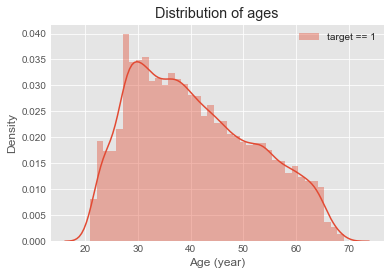

In [72]:
# distplot -> showing the KDE and bar in the same time
sns.distplot(df.loc[df.TARGET == 1, 'DAYS_BIRTH'], label = 'target == 1')
plt.legend()
plt.title('Distribution of ages')
plt.xlabel('Age (year)')
plt.ylabel('Density')
plt.show()

**It's your turn <br />
除了直接觀察變項以外，我們也可以分群比較  <br />
1.自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)  <br />
2.以年齡區間為 x, target 為 y 繪製 barplot **

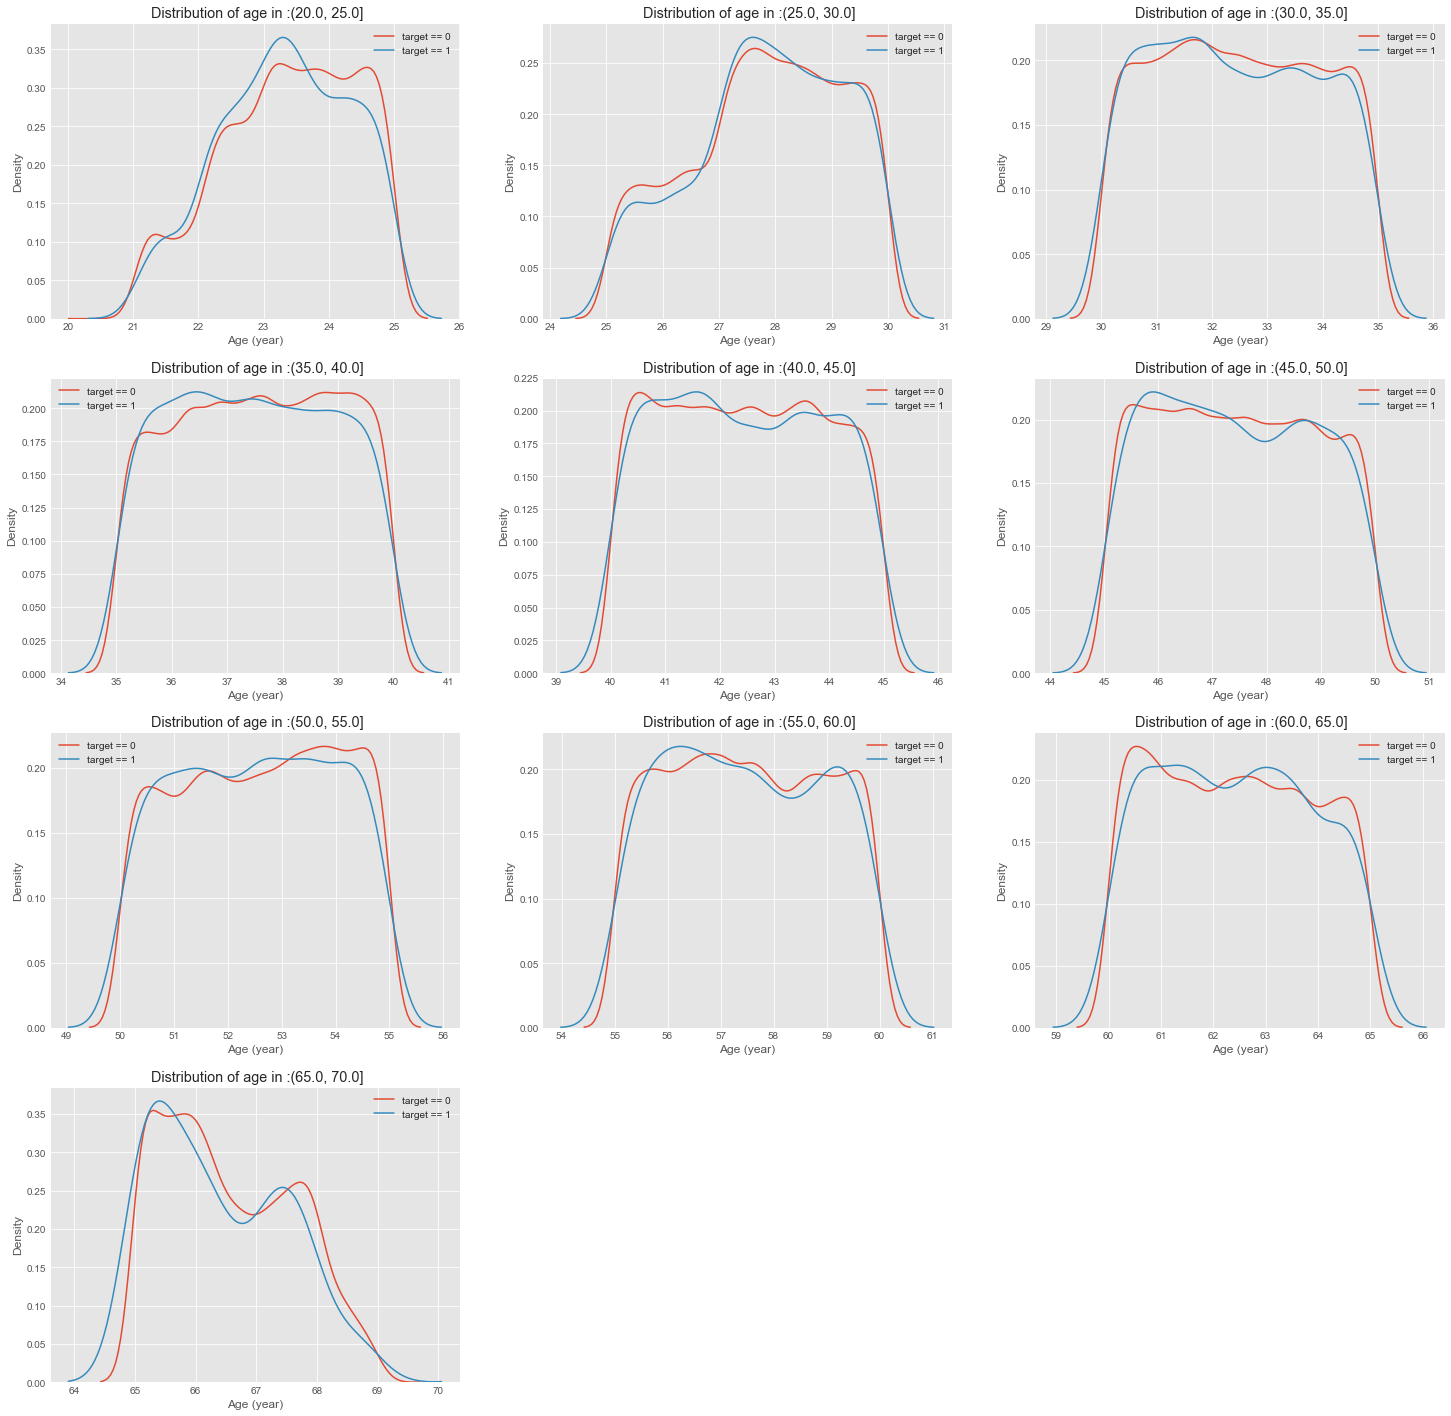

In [73]:
#1.自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot) 
cutArr = np.linspace(20,70,11)
df['DAYS_BIRTH_GROUP'] = pd.cut(df.DAYS_BIRTH,cutArr,include_lowest = False)
intervals = df.DAYS_BIRTH_GROUP.unique().sort_values()

plt.figure(figsize = (25,25))
for i, cut in enumerate(intervals):
    plt.subplot(4,3,i+1)
    sub_df = df[df.DAYS_BIRTH_GROUP == cut]
    sns.kdeplot(sub_df.loc[ sub_df.TARGET == 0, 'DAYS_BIRTH']  ,label = 'target == 0')
    sns.kdeplot(sub_df.loc[ sub_df.TARGET == 1,  'DAYS_BIRTH']  ,label = 'target == 1')
    plt.xlabel('Age (year)'); plt.ylabel('Density')
    plt.title(' Distribution of age in :' + str(cut) )
plt.show()

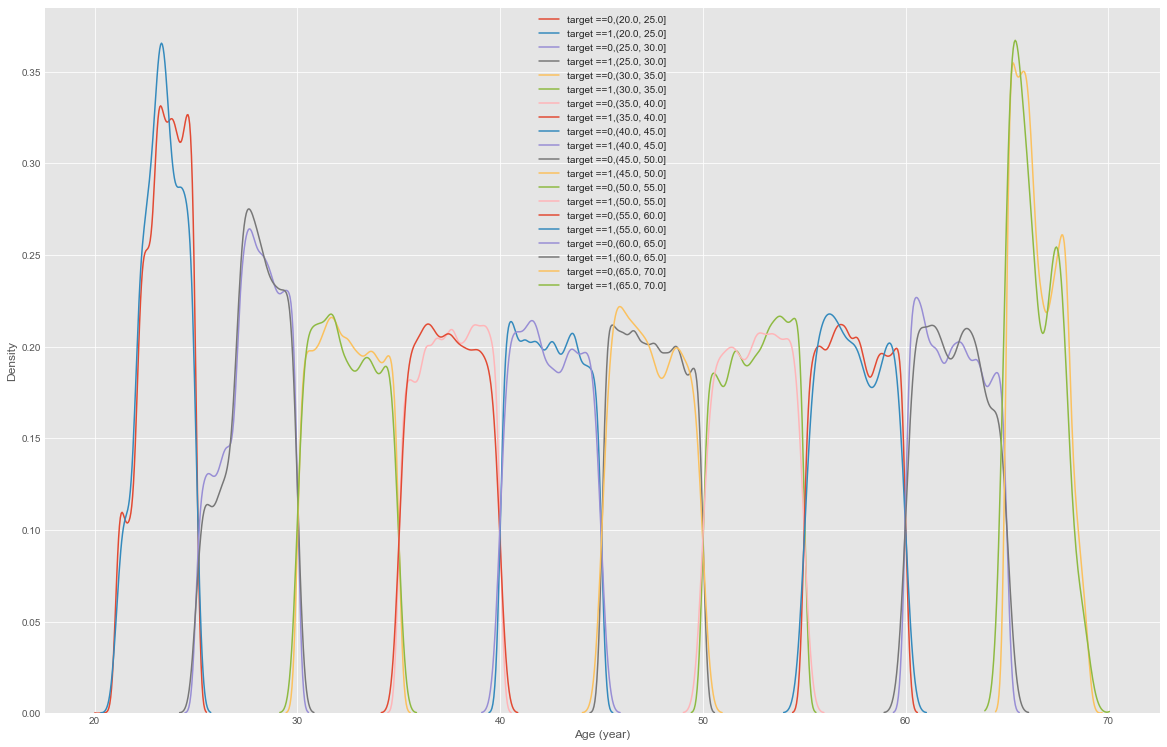

In [74]:
#1.自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot) 
plt.figure(figsize = (20,13))
for cut in intervals:
    sub_df = df[df.DAYS_BIRTH_GROUP == cut]
    sns.kdeplot(sub_df.loc[sub_df.TARGET == 0, 'DAYS_BIRTH'], label = 'target ==0,' + str(cut))
    sns.kdeplot(sub_df.loc[sub_df.TARGET == 1, 'DAYS_BIRTH'], label = 'target ==1,' + str(cut))
plt.xlabel('Age (year)')
plt.ylabel('Density')
plt.legend(loc = 'upper center')
plt.show()

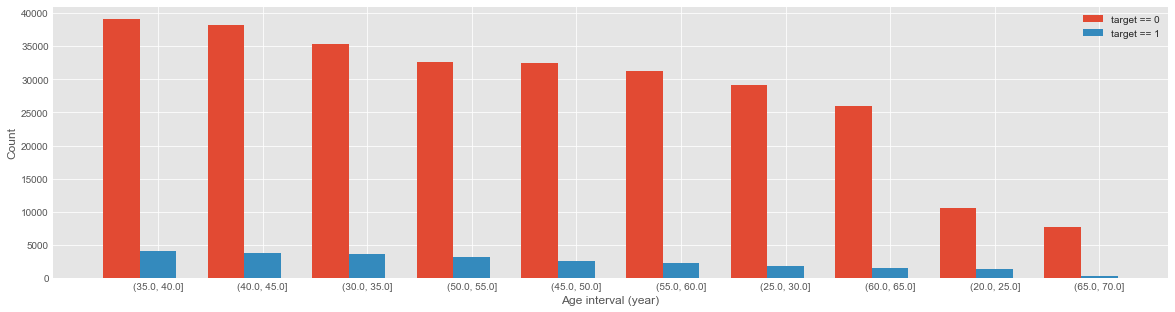

In [75]:
#2.以年齡區間為 x, target 為 y 繪製 barplot *

T1 = df.loc[df.TARGET == 1, 'DAYS_BIRTH_GROUP'].value_counts()
T0 =df.loc[df.TARGET == 0, 'DAYS_BIRTH_GROUP'].value_counts()
n_group = len(T0.index)
index = np.arange(n_group)

barWidth = 0.35
plt.figure(figsize = (20,5))
plt.bar(index,T0.values,barWidth,label = 'target == 0')
plt.bar(index+barWidth,T1.values,barWidth, label = 'target == 1')
plt.xlabel('Age interval (year)')
plt.ylabel('Count')
plt.xticks(index+barWidth, np.array(T0.index,dtype = str))
plt.legend()
plt.show()